In [1]:
import sys
sys.path.append('/lmh_data/work/sclab/train/')
sys.path.append('/lmh_data/work/sclab/analyse/')

import math
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from util import array2mat, mat2array
from analyse_util import figure_size, set_plt, set_Border

In [2]:
eval_set = np.load('/lmh_data/data/sclab/sclab/eval_dataset.npy', allow_pickle=True)
preds = np.load('/lmh_data/data/sclab/sclab/tmp/PDGFRA/evaluate.npy', allow_pickle=True)

In [3]:
def _draw(mat, ignore_diag=True):
    fig = plt.figure(figsize=[7, 7])
    ax = fig.add_subplot()
#     ax.set_title('{}:{}-{}.{}.{}'.format(chrom, start, end, strand, cell_type))
    if ignore_diag:
        np.fill_diagonal(mat, 0)
    sns.heatmap(mat, cmap='Reds_r', square=True)

In [4]:
def show_by_cell_type(cell_type):
    _pred, _target = None, None
    num = 0
    for i in range(len(preds)):
        pred = preds[i]
        if eval_set[i]['cell_type'] != cell_type:
            continue
        num += 1
        if _pred is None:
            _pred, _target = pred['predict'].copy(), pred['target'].copy()
        else:
            _pred += pred['predict']
            _target += pred['target']
    return _pred/num, _target/num

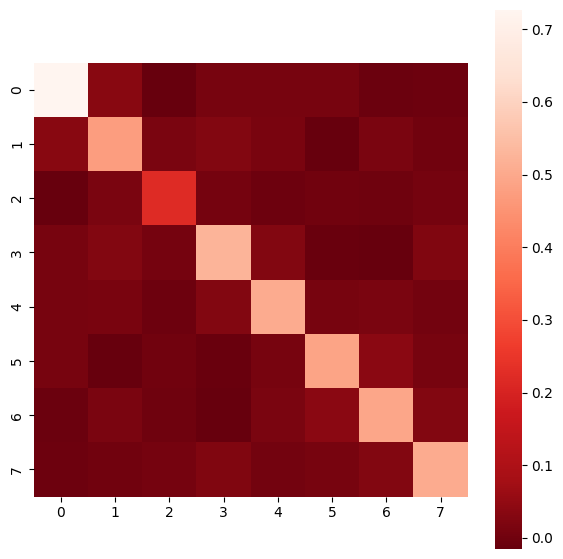

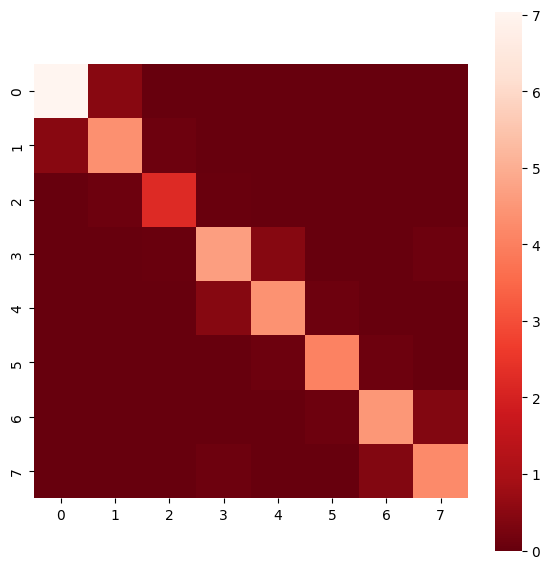

In [5]:
_pred, _target = show_by_cell_type('Astro')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

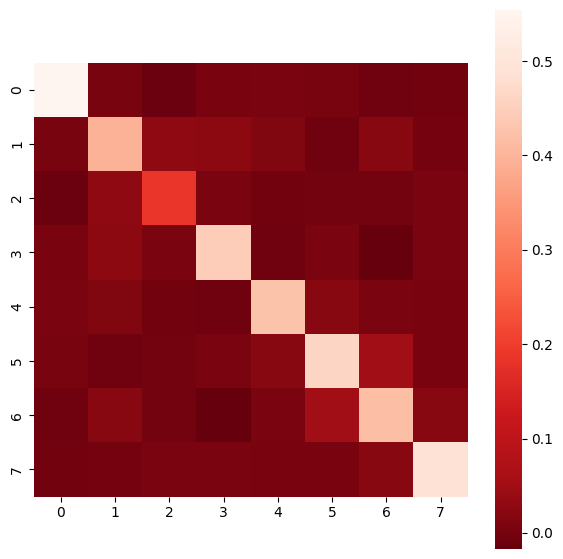

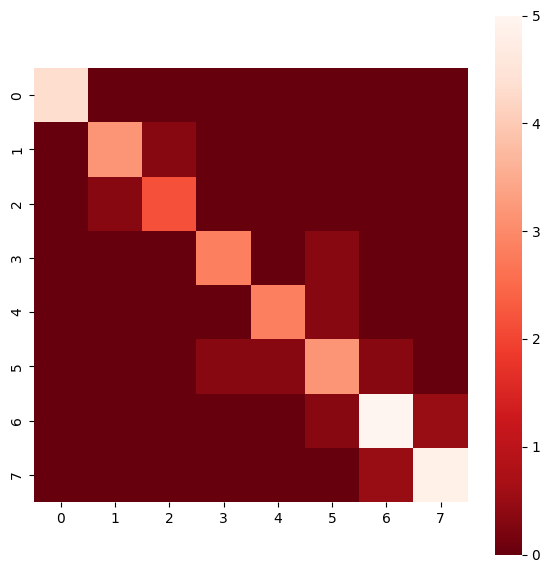

In [6]:
_pred, _target = show_by_cell_type('Endo')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

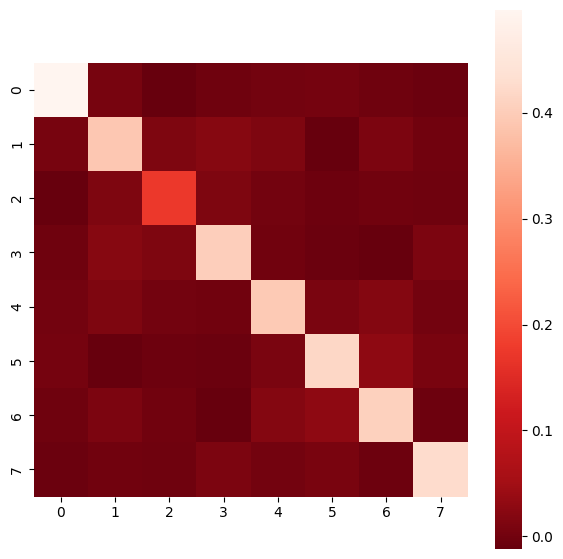

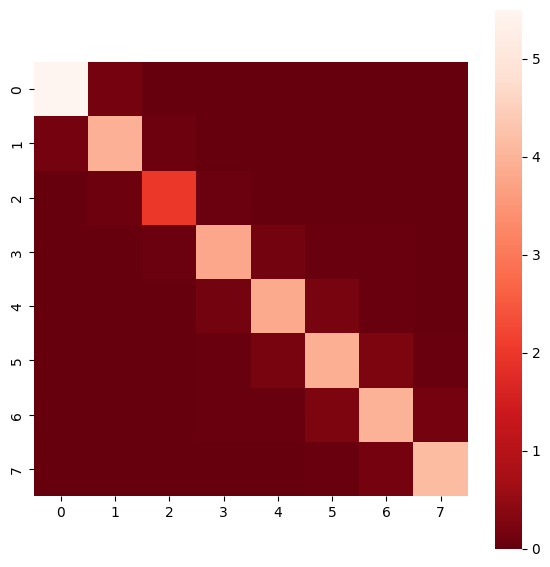

In [7]:
_pred, _target = show_by_cell_type('ODC')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

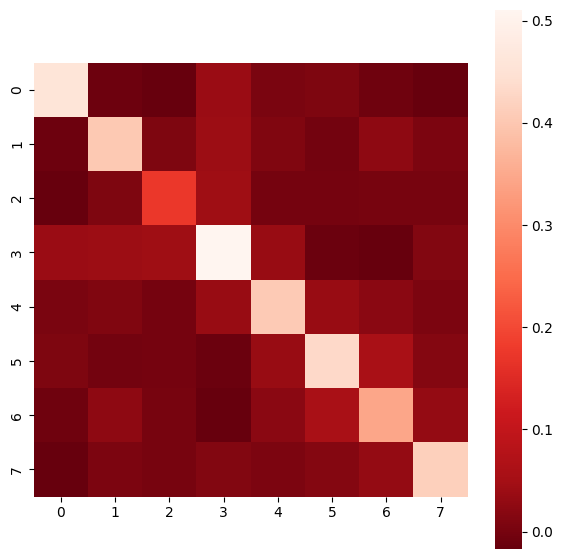

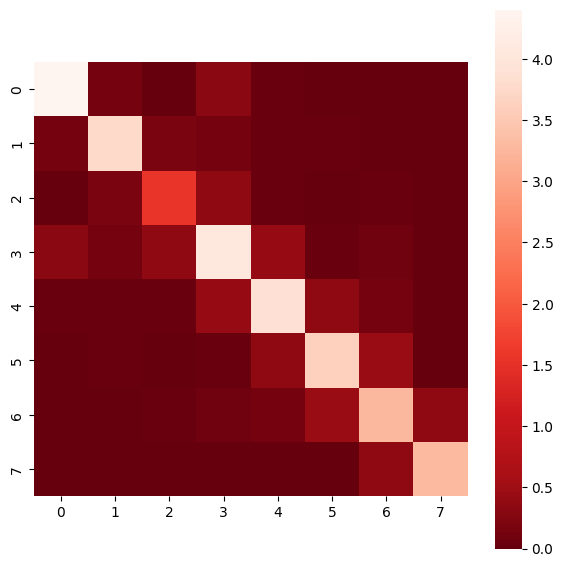

In [8]:
_pred, _target = show_by_cell_type('OPC')
_draw(array2mat(_pred), ignore_diag=False)
_draw(array2mat(_target), ignore_diag=False)

In [9]:
def cal_by_cell_type(cell_type):
    _values = []
    for i in range(len(preds)):
        pred = preds[i]
        if eval_set[i]['cell_type'] != cell_type:
            continue
        _values.append(stats.pearsonr(pred['predict'], pred['target'])[0])
    return _values

In [10]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _pred, _target = show_by_cell_type(cell_type)
    print('{}: {}'.format(cell_type, stats.pearsonr(_pred, _target)))

Astro: PearsonRResult(statistic=0.9965274742928524, pvalue=2.6920752054446277e-38)
Endo: PearsonRResult(statistic=0.9665265195439505, pvalue=1.1475173902156094e-21)
ODC: PearsonRResult(statistic=0.9961392158199333, pvalue=1.6267545059786928e-37)
OPC: PearsonRResult(statistic=0.993315494267936, pvalue=1.797746976313483e-33)


In [11]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _pred, _target = show_by_cell_type(cell_type)
    _pred, _target = array2mat(_pred), array2mat(_target)
    np.fill_diagonal(_pred, 0)
    np.fill_diagonal(_target, 0)
    _pred, _target = mat2array(_pred), mat2array(_target)
    print('{}: {}'.format(cell_type, stats.pearsonr(_pred, _target)))

Astro: PearsonRResult(statistic=0.6663827595543281, pvalue=9.133777233577352e-06)
Endo: PearsonRResult(statistic=0.6470985152676216, pvalue=1.999569538221667e-05)
ODC: PearsonRResult(statistic=0.3993418971510549, pvalue=0.015829008465175504)
OPC: PearsonRResult(statistic=0.7930467260426427, pvalue=8.08598374982999e-09)


In [12]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _pred, _target = show_by_cell_type(cell_type)
    _pred, _target = array2mat(_pred), array2mat(_target)
    _pred = _pred[_target!=0]
    _target = _target[_target!=0]
    print('{}: {}'.format(cell_type, stats.pearsonr(_pred, _target)))

Astro: PearsonRResult(statistic=0.9959540509728315, pvalue=4.595836827036508e-35)
Endo: PearsonRResult(statistic=0.9492189746394926, pvalue=1.8950171848923405e-09)
ODC: PearsonRResult(statistic=0.9954513613866274, pvalue=7.935079569479902e-57)
OPC: PearsonRResult(statistic=0.9931588172464942, pvalue=6.230120093473615e-39)


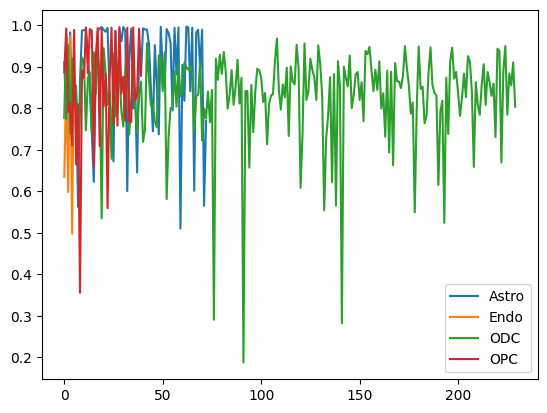

In [13]:
for cell_type in ['Astro', 'Endo', 'ODC', 'OPC']:
    _values = cal_by_cell_type(cell_type)
    plt.plot(list(range(0, len(_values))), _values, label=cell_type)

plt.legend()
plt.show()

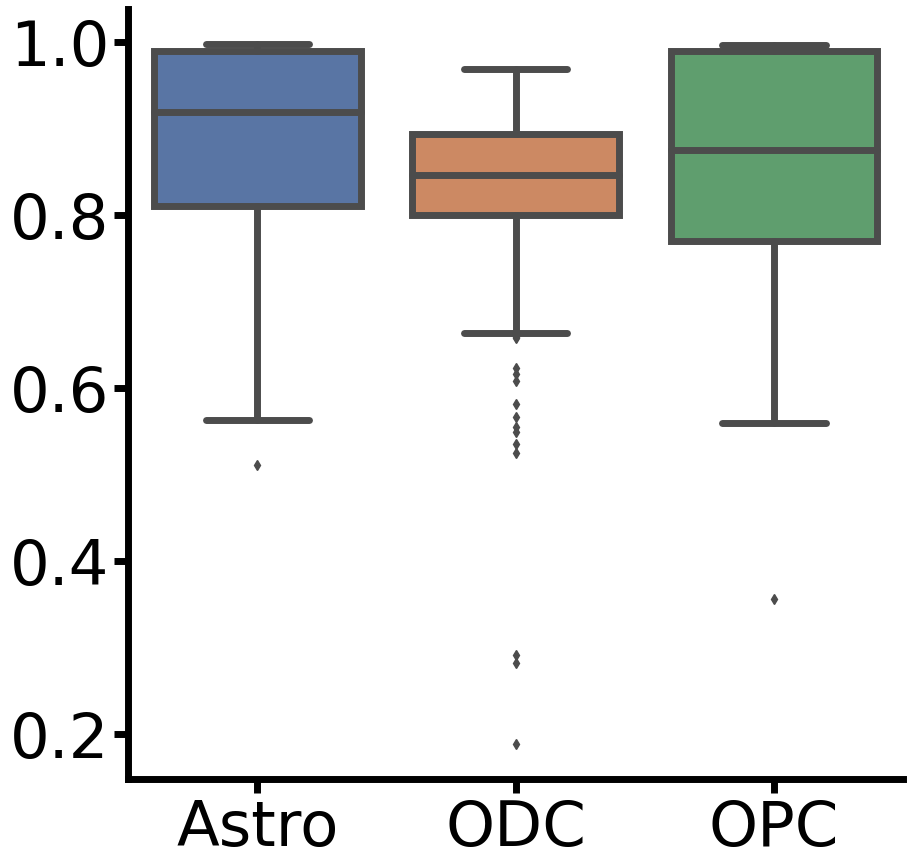

In [14]:
set_plt(figsize=(10, 10))
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()

plot_values = [cal_by_cell_type(cell_type) for cell_type in ['Astro', 'ODC', 'OPC']]
ax = sns.boxplot(data=plot_values, linewidth=figure_size['very_small'])

ax.set_xticklabels(labels=['Astro', 'ODC', 'OPC']) 

set_Border(plt.gca())
plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
plt.grid(False)

# plt.xlabel("Pearson", fontsize=figure_size['ultra'])
# plt.ylabel("Cell Type", fontsize=figure_size['ultra'])
plt.savefig('/lmh_data/work/sclab/analyse/figure_file/PDGFRA pearson.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [15]:
mats = dict()
cell_types = ['Astro', 'Endo', 'OPC', 'ODC']
for cell_type in cell_types :
    _pred, _target = show_by_cell_type(cell_type)
    _pred, _target = array2mat(_pred), array2mat(_target)
#     _pred = _pred[_target!=0]
#     _target = _target[_target!=0]
    
    mats[cell_type] = (_pred, _target)

def _pearsonr(_pred, _target):
    _pred, _target = _pred.copy(), _target.copy()
    np.fill_diagonal(_pred, 0)
    np.fill_diagonal(_target, 0)
#     _pred = _pred[_target!=0]
#     _target = _target[_target!=0]
    return stats.pearsonr(_pred.reshape(-1), _target.reshape(-1))[0]

_pearsonrs = np.zeros((len(cell_types), len(cell_types)))
for i in range(len(cell_types)):
    for j in range(i, len(cell_types)):
        _pearsonrs[i][j] = _pearsonr(mats[cell_types[i]][0], mats[cell_types[j]][0])
_pearsonrs

array([[1.        , 0.69439775, 0.69733189, 0.71642471],
       [0.        , 1.        , 0.72298971, 0.77819547],
       [0.        , 0.        , 1.        , 0.69665447],
       [0.        , 0.        , 0.        , 1.        ]])

In [16]:
import anndata
import scanpy as sc

results, cell_types = [], []
for i in range(len(preds)):
    _pred = preds[i]['predict']
#     _pred = array2mat(preds[i]['predict'])
#     _pred = _pred[np.triu_indices_from(_pred, k=1)]
    results.append(_pred)
    cell_types.append(eval_set[i]['cell_type'])
results, cell_types = np.array(results), np.array(cell_types)

results = anndata.AnnData(X = results)
results.obs['cell_type'] = cell_types
results

AnnData object with n_obs × n_vars = 349 × 36
    obs: 'cell_type'

In [17]:
sc.tl.pca(results, n_comps=10, svd_solver="auto")
sc.pp.neighbors(results, metric="cosine")
sc.tl.umap(results)

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:369: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:379: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


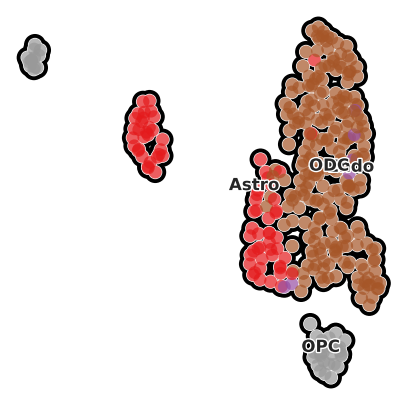

In [18]:
from matplotlib.pyplot import rc_context

with rc_context({'figure.figsize': (5, 5)}):
    fig = sc.pl.umap(results, color=['cell_type'], add_outline=True, legend_loc='on data', title='',
               legend_fontsize=12, legend_fontoutline=2, frameon=False, palette='Set1', return_fig=True)
    plt.savefig('/lmh_data/work/sclab/analyse/figure_file/PDGFRA_predict_umap.pdf', format='pdf', bbox_inches='tight')
    plt.show()